<a href="https://colab.research.google.com/github/sergioalegre/Python-for-AI-and-machine-learning/blob/master/Enfermedades_carciacas_con_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Predecir si una persona tendrá o no enfermedades cardiovasculares

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#cargar dataset
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [4]:
df = pd.read_csv('cardio_train.csv', sep =';')

df.head(10) #veremos que la edad está en días y 'cardio' es si esa persona tuvo o no enfermedad cardíaca

id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0
5   8  21914       1     151    67.0  ...     2      0     0       0       0
6   9  22113       1     157    93.0  ...     1      0     0       1       0
7  12  22584       2     178    95.0  ...     3      0     0       1       1
8  13  17668       1     158    71.0  ...     1      0     0       1       0
9  14  19834       1     164    68.0  ...     1      0     0       0       0

[10 rows x 13 columns]

In [5]:
df.shape #70000 observaciones y 13 caracteristicas

(70000, 13)

In [6]:
#buscar valores vacios. Forma1: contar valores vacios de cada columna

df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#buscar valores vacios. Forma2: 
df.isnull().values.any() #esperamos que nos diga False

False

In [8]:
#estadísticas básicas
df.describe()

id           age  ...        active        cardio
count  70000.000000  70000.000000  ...  70000.000000  70000.000000
mean   49972.419900  19468.865814  ...      0.803729      0.499700
std    28851.302323   2467.251667  ...      0.397179      0.500003
min        0.000000  10798.000000  ...      0.000000      0.000000
25%    25006.750000  17664.000000  ...      1.000000      0.000000
50%    50001.500000  19703.000000  ...      1.000000      0.000000
75%    74889.250000  21327.000000  ...      1.000000      1.000000
max    99999.000000  23713.000000  ...      1.000000      1.000000

[8 rows x 13 columns]

In [9]:
#calcular personas enfermas y sanas

df['cardio'].value_counts() #este dataset tiene 50% sanos y 50% enfermos

0    35021
1    34979
Name: cardio, dtype: int64

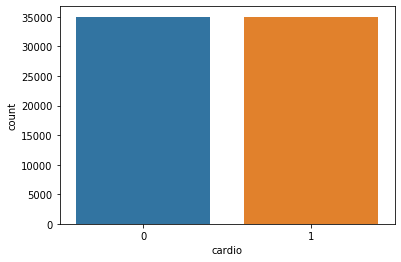

In [10]:
#visualizar el mismo dato en gráfico
sns.countplot(df['cardio'])

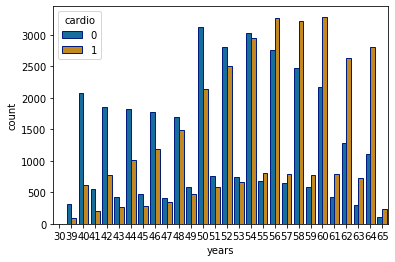

In [11]:
#creamos una nueva columna 'años'

df['years'] = (df['age'] /365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

In [12]:
#correlación entre columnas, parte1
df.corr()

id       age    gender  ...    active    cardio     years
id           1.000000  0.003457  0.003502  ...  0.003755  0.003799  0.003050
age          0.003457  1.000000 -0.022811  ... -0.009927  0.238159  0.999090
gender       0.003502 -0.022811  1.000000  ...  0.005866  0.008109 -0.023017
height      -0.003038 -0.081515  0.499033  ... -0.006570 -0.010821 -0.081456
weight      -0.001830  0.053684  0.155406  ... -0.016867  0.181660  0.053661
ap_hi        0.003356  0.020764  0.006005  ... -0.000033  0.054475  0.020793
ap_lo       -0.002529  0.017647  0.015254  ...  0.004780  0.065719  0.017754
cholesterol  0.006106  0.154424 -0.035821  ...  0.009911  0.221147  0.154386
gluc         0.002467  0.098703 -0.020491  ... -0.006770  0.089307  0.098596
smoke       -0.003699 -0.047633  0.338135  ...  0.025858 -0.015486 -0.047884
alco         0.001210 -0.029723  0.170966  ...  0.025476 -0.007330 -0.029918
active       0.003755 -0.009927  0.005866  ...  1.000000 -0.035653 -0.009819
cardio       0.003799  0.238159  0.008109  ... -0.035653  1.000000  0.237749
years        0.003050  0.999090 -0.023017  ... -0.009819  0.237749  1.000000

[14 rows x 14 columns]

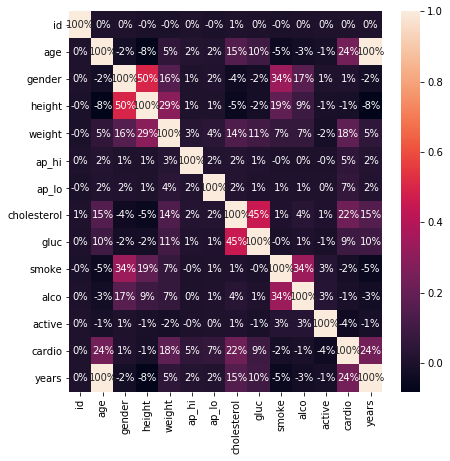

In [13]:
#correlación entre columnas, parte2
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%') #vemos que 'cardio' que es lo que queremos saber esta correlacionado en mayor peso con algunas columnas

#como curiosidad 'age' y 'years' tiene un 100% correlación, lo que es lógico

In [0]:
#eliminamos la columna 'years' y la columan 'id'

df = df.drop('years', axis=1)
df = df.drop('id', axis=1)

In [0]:
#partimos el dataset entre caracteristicas y objetivo

X = df.iloc[:, :-1].values # X será todo el dataset menos la última columna 'cardio'
Y = df.iloc[:, -1].values

In [0]:
#partimos el dataset training y testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [0]:
#escalamos caracteristicas entre 0 y 1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
#ver el accuracy del modelo con los datos de entrenamiento

model = forest
model.score(X_train, Y_train)

0.979904761904762

In [24]:
#ver el accuracy del modelo con los datos de testing

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6487 2122]
 [3093 5798]]
Model Test Accuracy = 0.702
